# PILLOW

In [2]:
# load and show an image with Pillow
from PIL import Image
# load the image
image = Image.open('Cariere_in_IT_background.png')
# summarize some details about the image
print(image.format)
print(image.mode)
print(image.size)
# show the image
image.show()

PNG
RGBA
(768, 768)


float32
(768, 768, 4)


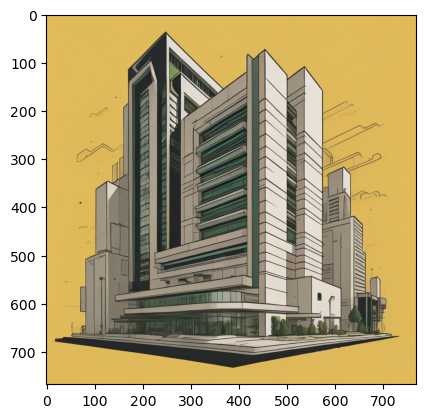

In [3]:
# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
# load image as pixel array
data = image.imread('Cariere_in_IT_background.png')
# summarize shape of the pixel array
print(data.dtype)
print(data.shape)
# display the array of pixels as an image
pyplot.imshow(data)
pyplot.show()

In [5]:
# create a thumbnail of an image
from PIL import Image
# load the image
image = Image.open('Cariere_in_IT_background.png')
# report the size of the image
print(image.size)
# create a thumbnail and preserve aspect ratio
image.thumbnail((100,100))
# report the size of the thumbnail
print(image.size)
image.show()

(768, 768)
(100, 100)


# Unfair probability spinner

150 at index 3 with probability 41.67%


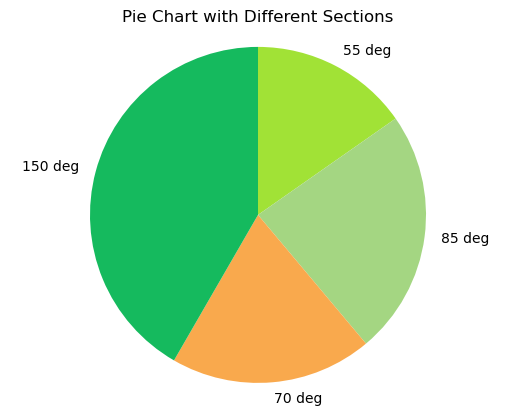

In [15]:
import matplotlib.pyplot as plt
import numpy
import random

def get_random_index(probabilities, n):
    p = numpy.array(probabilities)
    p /= p.sum()
    return numpy.random.choice(numpy.arange(0, n), p=p)

def get_random_rgb_color():
    return (random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1))

def plot_pie_chart(degrees_list):
    colors_list = [get_random_rgb_color() for i in range(len(degrees_list))]
    
    labels = [f'{degrees_list[i]} deg' for i in range(len(degrees_list))]

    probabilities = [(degrees_list[index] / 360 * 100) for index in range(len(degrees_list))]
    
    index = get_random_index(probabilities, len(degrees_list))
    
    print(f'{degrees_list[index]} at index {index} with probability ' + str('{:.2f}'.format(probabilities[index])) + '%')
    
    plt.pie(degrees_list, labels=labels, startangle=90, counterclock=False, colors=colors_list)
    plt.title("Pie Chart with Different Sections")
    plt.axis('equal')  # Equal aspect ratio ensures the pie chart looks like a circle
    plt.show()

degrees_list = numpy.array([55, 85, 70, 150])
plot_pie_chart(degrees_list)
# each index has the probability of being chosen as degrees_list[index] / 360

# Monte Carlo Simulation

Monte Carlo Estimated Probability: 0.2800
Mathematically Deduced Probability: 0.2827


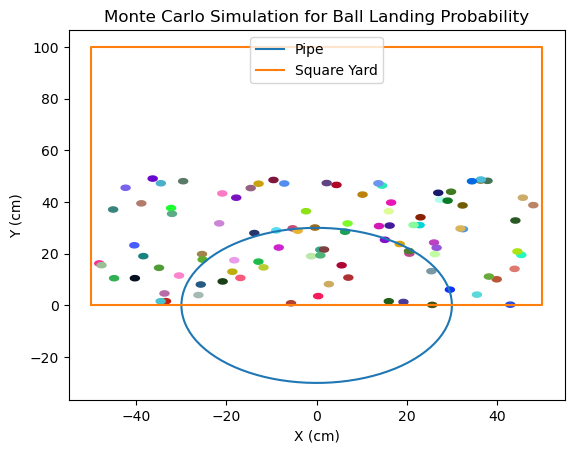

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import random

def get_random_rgb_color():
    return (random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1))

def draw_circle(center_x, center_y, radius):
    theta = np.linspace(0, 2*np.pi, 100)
    x = center_x + radius * np.cos(theta)
    y = center_y + radius * np.sin(theta)

    plt.fill(x, y, color=get_random_rgb_color())

def monte_carlo_simulation(balls, R, l, r):
    pipe_area = np.pi * R**2
    square_yard_area = l**2

    inside_pipe_count = 0

    for _ in range(balls):
        x = np.random.uniform(-l/2, l/2)  # Random x-coordinate within the square yard
        y = np.random.uniform(0, l/2)        # Random y-coordinate within the square yard
        draw_circle(x, y, r)

        # Check if the ball falls inside the pipe
        if x**2 + y**2 <= R**2:
            inside_pipe_count += 1

    estimated_probability = inside_pipe_count / balls
    actual_probability = pipe_area / square_yard_area

    return estimated_probability, actual_probability

balls = 100  # number of trials
R = 30  # Radius of the pipe in centimeters
r = 1  # Radius of the falling balls in centimeters
l = 100  # Edge length of the square yard in centimeters

# Run the Monte Carlo simulation
estimated_prob, actual_prob = monte_carlo_simulation(balls, R, l, r)

# Print the results
print(f"Monte Carlo Estimated Probability: {estimated_prob:.4f}")
print(f"Mathematically Deduced Probability: {actual_prob:.4f}")

# Plot the pipe and square yard for visualization
theta = np.linspace(0, 2*np.pi, 100)
pipe_x = R * np.cos(theta)
pipe_y = R * np.sin(theta)

# change the coordinates
yard_x = [-50, 50, 50, -50, -50]
yard_y = [0, 0, 100, 100, 0]

plt.plot(pipe_x, pipe_y, label='Pipe')
plt.plot(yard_x, yard_y, label='Square Yard')
plt.xlabel('X (cm)')
plt.ylabel('Y (cm)')
plt.title('Monte Carlo Simulation for Ball Landing Probability')
plt.legend()
plt.show()